In [58]:
import geopandas as gpd
import pandas as pd
import contextily as cx
import numpy as np
from pointpats import centrography
from shapely.geometry import Point
import matplotlib.pyplot as plt
from scipy import stats
import shapely as shapely
import h3 as h3
from tobler.util import h3fy
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import plot_local_autocorrelation
import seaborn as sns

In [3]:
pip install h3

Note: you may need to restart the kernel to use updated packages.


need to define gdf before running the below

temp. oxygen, ph, turbidity

In [5]:
df = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\4states.csv")

In [8]:
df = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\states_trim.csv")

In [126]:
df.groupby(df['CharacteristicName']).count()

,field_1,ActivityStartTime/Time,ActivityStartDate,MonitoringLocationIdentifier,ResultTemperatureBasisText,ResultMeasureValue,ResultMeasure/MeasureUnitCode,geometry
CharacteristicName,,,,,,,,
Dissolved oxygen (DO),36506,36506,36506,36506,36506,36506,36506,0
"Temperature, water",46892,46892,46892,46892,46892,46892,46892,0
Turbidity,22004,22004,22004,22004,22004,22004,22004,0


In [9]:
df1 = df[['ActivityStartTime/Time','ActivityStartDate','CharacteristicName', 'MonitoringLocationIdentifier', 'ResultTemperatureBasisText', 'ResultMeasureValue', 'ResultMeasure/MeasureUnitCode']]

In [10]:
df1 = df1.loc[(df1['CharacteristicName']=="Turbidity") | (df1['CharacteristicName']=="Dissolved oxygen (DO)") | (df1['CharacteristicName']=="Temperature, water") | (df1['CharacteristicName']=="ph")]

In [11]:
df1

,ActivityStartTime/Time,ActivityStartDate,CharacteristicName,MonitoringLocationIdentifier,ResultTemperatureBasisText,ResultMeasureValue,ResultMeasure/MeasureUnitCode
0,10:28:00,2021-04-19,Dissolved oxygen (DO),21FLCOMI_WQX-HUMMINGBIRD,,3.07,mg/l
1,10:08:00,2021-04-21,Dissolved oxygen (DO),MORONGO1_WQX-M001,,9.54,mg/l
2,10:26:00,2021-05-10,Dissolved oxygen (DO),21FLSFWM_WQX-5598,,6.12,mg/l
3,09:00:00,2021-04-12,"Temperature, water",21FLORAN_WQX-HBH,,20.7,deg C
4,10:53:00,2021-05-17,Dissolved oxygen (DO),21FLSJWM_WQX-45556,,5.49,mg/l
...,...,...,...,...,...,...,...
105397,15:17:00,2021-10-16,"Temperature, water",USGS-08155395,,22.0,deg C
105398,15:17:00,2021-10-16,Turbidity,USGS-08155395,,7.0,FNU
105399,10:59:00,2021-12-06,"Temperature, water",USGS-11453000,,11.7,deg C
105400,08:30:00,2021-12-20,"Temperature, water",USGS-11066460,,13.1,deg C


In [13]:
df1.to_csv(r"C:\Users\p7j5p\Documents\Paul's reports\696\states_trim.csv")

In [125]:
df1.groupby(df1['CharacteristicName']).count()

,ActivityStartTime/Time,ActivityStartDate,MonitoringLocationIdentifier,ResultTemperatureBasisText,ResultMeasureValue,ResultMeasure/MeasureUnitCode
CharacteristicName,,,,,,
Dissolved oxygen (DO),36506,36506,36506,36506,36506,36506
"Temperature, water",46892,46892,46892,46892,46892,46892
Turbidity,22004,22004,22004,22004,22004,22004


In [3]:
sites = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\station.csv")

In [12]:
sites

,OrganizationFormalName,MonitoringLocationIdentifier,LongitudeMeasure,LatitudeMeasure,OrganizationIdentifier
0,USGS Alabama Water Science Center,USGS-02376115,-87.3358086000000,30.49825159000000,USGS-AL
1,USGS Alabama Water Science Center,USGS-02376500,-87.4402778000000,30.69027778000000,USGS-AL
2,USGS Alabama Water Science Center,USGS-294533085012101,-85.0224114900000,29.75937734000000,USGS-AL
3,USGS Alabama Water Science Center,USGS-294533085012102,-85.0224114900000,29.75937734000000,USGS-AL
4,USGS Alabama Water Science Center,USGS-294533085012103,-85.0224114900000,29.75937734000000,USGS-AL
...,...,...,...,...,...
253637,USGS Texas Water Science Center,USIBW-08450900,-101.0412100000000,29.42522559000000,USGS-TX
253638,USGS Texas Water Science Center,USIBW-08451800,-100.9284283000000,29.33550774000000,USGS-TX
253639,USGS Texas Water Science Center,USIBW-08458000,-100.5072994000000,28.71414303000000,USGS-TX
253640,USGS Texas Water Science Center,USIBW-08468600,-98.3364038000000,26.13090908000000,USGS-TX


In [5]:
sites = sites[['OrganizationFormalName', 'MonitoringLocationIdentifier', 'LongitudeMeasure', 'LatitudeMeasure', 'OrganizationIdentifier']]

In [7]:
sites.to_csv(r"C:\Users\p7j5p\Documents\Paul's reports\696\sites_trim.csv")

In [13]:
gdf = pd.merge(sites, df1, on='MonitoringLocationIdentifier', how='right')

In [14]:
gdf

,OrganizationFormalName,MonitoringLocationIdentifier,LongitudeMeasure,LatitudeMeasure,OrganizationIdentifier,ActivityStartTime/Time,ActivityStartDate,CharacteristicName,ResultTemperatureBasisText,ResultMeasureValue,ResultMeasure/MeasureUnitCode
0,NaN,21FLCOMI_WQX-HUMMINGBIRD,NaN,NaN,NaN,10:28:00,2021-04-19,Dissolved oxygen (DO),,3.07,mg/l
1,NaN,MORONGO1_WQX-M001,NaN,NaN,NaN,10:08:00,2021-04-21,Dissolved oxygen (DO),,9.54,mg/l
2,NaN,21FLSFWM_WQX-5598,NaN,NaN,NaN,10:26:00,2021-05-10,Dissolved oxygen (DO),,6.12,mg/l
3,NaN,21FLORAN_WQX-HBH,NaN,NaN,NaN,09:00:00,2021-04-12,"Temperature, water",,20.7,deg C
4,NaN,21FLSJWM_WQX-45556,NaN,NaN,NaN,10:53:00,2021-05-17,Dissolved oxygen (DO),,5.49,mg/l
...,...,...,...,...,...,...,...,...,...,...,...
105397,USGS Texas Water Science Center,USGS-08155395,-97.7742222000000,30.26366667000000,USGS-TX,15:17:00,2021-10-16,"Temperature, water",,22.0,deg C
105398,USGS Texas Water Science Center,USGS-08155395,-97.7742222000000,30.26366667000000,USGS-TX,15:17:00,2021-10-16,Turbidity,,7.0,FNU
105399,USGS California Water Science Center,USGS-11453000,-121.6441266000000,38.67768170000000,USGS-CA,10:59:00,2021-12-06,"Temperature, water",,11.7,deg C
105400,USGS California Water Science Center,USGS-11066460,-117.4483806000000,33.96862566000000,USGS-CA,08:30:00,2021-12-20,"Temperature, water",,13.1,deg C


In [15]:
gdf['geometry'] = gpd.points_from_xy(gdf['LongitudeMeasure'], gdf['LatitudeMeasure'])

In [108]:
gdf1 = gpd.GeoDataFrame(gdf, geometry='geometry')

In [109]:
gdf1

,OrganizationFormalName,MonitoringLocationIdentifier,LongitudeMeasure,LatitudeMeasure,OrganizationIdentifier,ActivityStartTime/Time,ActivityStartDate,CharacteristicName,ResultTemperatureBasisText,ResultMeasureValue,ResultMeasure/MeasureUnitCode,geometry
0,NaN,21FLCOMI_WQX-HUMMINGBIRD,NaN,NaN,NaN,10:28:00,2021-04-19,Dissolved oxygen (DO),,3.07,mg/l,POINT EMPTY
1,NaN,MORONGO1_WQX-M001,NaN,NaN,NaN,10:08:00,2021-04-21,Dissolved oxygen (DO),,9.54,mg/l,POINT EMPTY
2,NaN,21FLSFWM_WQX-5598,NaN,NaN,NaN,10:26:00,2021-05-10,Dissolved oxygen (DO),,6.12,mg/l,POINT EMPTY
3,NaN,21FLORAN_WQX-HBH,NaN,NaN,NaN,09:00:00,2021-04-12,"Temperature, water",,20.70,deg C,POINT EMPTY
4,NaN,21FLSJWM_WQX-45556,NaN,NaN,NaN,10:53:00,2021-05-17,Dissolved oxygen (DO),,5.49,mg/l,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...
105397,USGS Texas Water Science Center,USGS-08155395,-97.7742222000000,30.26366667000000,USGS-TX,15:17:00,2021-10-16,"Temperature, water",,22.00,deg C,POINT (-97.77422 30.26367)
105398,USGS Texas Water Science Center,USGS-08155395,-97.7742222000000,30.26366667000000,USGS-TX,15:17:00,2021-10-16,Turbidity,,7.00,FNU,POINT (-97.77422 30.26367)
105399,USGS California Water Science Center,USGS-11453000,-121.6441266000000,38.67768170000000,USGS-CA,10:59:00,2021-12-06,"Temperature, water",,11.70,deg C,POINT (-121.64413 38.67768)
105400,USGS California Water Science Center,USGS-11066460,-117.4483806000000,33.96862566000000,USGS-CA,08:30:00,2021-12-20,"Temperature, water",,13.10,deg C,POINT (-117.44838 33.96863)


In [17]:
gdf1.crs = 4326

In [110]:
gdf1 = gdf1.to_crs("EPSG:4326")

In [111]:
print(gdf1.crs)

epsg:4326


In [112]:
gdf1['ResultMeasureValue'] = pd.to_numeric(gdf['ResultMeasureValue'], errors='coerce')

In [113]:
gdf1

,OrganizationFormalName,MonitoringLocationIdentifier,LongitudeMeasure,LatitudeMeasure,OrganizationIdentifier,ActivityStartTime/Time,ActivityStartDate,CharacteristicName,ResultTemperatureBasisText,ResultMeasureValue,ResultMeasure/MeasureUnitCode,geometry
0,NaN,21FLCOMI_WQX-HUMMINGBIRD,NaN,NaN,NaN,10:28:00,2021-04-19,Dissolved oxygen (DO),,3.07,mg/l,POINT EMPTY
1,NaN,MORONGO1_WQX-M001,NaN,NaN,NaN,10:08:00,2021-04-21,Dissolved oxygen (DO),,9.54,mg/l,POINT EMPTY
2,NaN,21FLSFWM_WQX-5598,NaN,NaN,NaN,10:26:00,2021-05-10,Dissolved oxygen (DO),,6.12,mg/l,POINT EMPTY
3,NaN,21FLORAN_WQX-HBH,NaN,NaN,NaN,09:00:00,2021-04-12,"Temperature, water",,20.70,deg C,POINT EMPTY
4,NaN,21FLSJWM_WQX-45556,NaN,NaN,NaN,10:53:00,2021-05-17,Dissolved oxygen (DO),,5.49,mg/l,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...
105397,USGS Texas Water Science Center,USGS-08155395,-97.7742222000000,30.26366667000000,USGS-TX,15:17:00,2021-10-16,"Temperature, water",,22.00,deg C,POINT (-97.77422 30.26367)
105398,USGS Texas Water Science Center,USGS-08155395,-97.7742222000000,30.26366667000000,USGS-TX,15:17:00,2021-10-16,Turbidity,,7.00,FNU,POINT (-97.77422 30.26367)
105399,USGS California Water Science Center,USGS-11453000,-121.6441266000000,38.67768170000000,USGS-CA,10:59:00,2021-12-06,"Temperature, water",,11.70,deg C,POINT (-121.64413 38.67768)
105400,USGS California Water Science Center,USGS-11066460,-117.4483806000000,33.96862566000000,USGS-CA,08:30:00,2021-12-20,"Temperature, water",,13.10,deg C,POINT (-117.44838 33.96863)


In [21]:
gdf1 = gdf1.dropna(subset=['ResultMeasureValue'])
gdf1 = gdf1.dropna(subset=['LongitudeMeasure'])
#for cleaning data

In [76]:
ca = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\ca-state-boundary\CA_State_TIGER2016.shp") #Need to reproject to 4326
fl = gpd.read_file("https://gis.fdot.gov/arcgis/rest/services/Admin_Boundaries/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")
ny = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\Intro to GIS\NY shapefile data\State.shp") #Need to reproject to 4326
tx = gpd.read_file('https://services.arcgis.com/KTcxiTD9dsQw4r7Z/arcgis/rest/services/Texas_State_Boundary/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson')

In [86]:
ca = ca.to_crs("EPSG:4326")
ny = ny.to_crs("EPSG:4326")

In [114]:
#gdfca = gpd.sjoin(gdf1, ca, how='left', predicate='contains')
gdfca = gdf1.sjoin(ca)
gdffl = gdf1.sjoin(fl)
gdfny = gdf1.sjoin(ny)
gdftx = gdf1.sjoin(tx)

#gdffl = gpd.sjoin(gdf1, fl, how='left', predicate='within')
#gdfny = gpd.sjoin(gdf1, ny, how='left', predicate='within')
#gdftx = gpd.sjoin(gdf1, tx, how='left', predicate='within')

In [115]:
gdfca

,OrganizationFormalName,MonitoringLocationIdentifier,LongitudeMeasure,LatitudeMeasure,OrganizationIdentifier,ActivityStartTime/Time,ActivityStartDate,CharacteristicName,ResultTemperatureBasisText,ResultMeasureValue,...,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
96852,USGS California Water Science Center,USGS-11447650,-121.5013437000000,38.45601954000000,USGS-CA,11:25:00,2021-08-19,"Temperature, water",,23.1,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
96858,USGS California Water Science Center,USGS-11128500,-120.1445926000000,34.58498706000000,USGS-CA,11:50:00,2021-09-02,"Temperature, water",,20.9,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
96866,USGS California Water Science Center,USGS-11453000,-121.6441266000000,38.67768170000000,USGS-CA,09:51:00,2021-08-01,"Temperature, water",,23.8,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
96869,USGS California Water Science Center,USGS-343830120065001,-120.1138610000000,34.64161110000000,USGS-CA,00:00:00,2021-07-14,"Temperature, water",,18.4,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
96870,USGS California Water Science Center,USGS-344623117550001,-117.9166667000000,34.77305556000000,USGS-CA,16:05:00,2021-08-09,"Temperature, water",,26.0,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105392,USGS California Water Science Center,USGS-391448122565601,-122.9488889000000,39.24679167000000,USGS-CA,10:40:00,2021-12-21,Turbidity,,0.8,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
105395,USGS California Water Science Center,USGS-11447650,-121.5013437000000,38.45601954000000,USGS-CA,10:54:00,2021-11-26,"Temperature, water",,13.0,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
105396,USGS California Water Science Center,USGS-383653122204601,-122.3459917000000,38.61460278000000,USGS-CA,23:00:00,2021-12-13,Turbidity,,39.0,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
105399,USGS California Water Science Center,USGS-11453000,-121.6441266000000,38.67768170000000,USGS-CA,10:59:00,2021-12-06,"Temperature, water",,11.7,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183


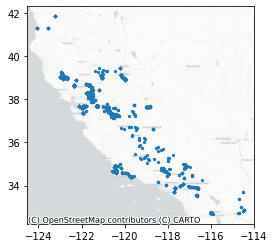

In [116]:
ax = gdfca.plot(markersize=5)
cx.add_basemap(ax, crs=gdfca.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('on');

In [122]:
gdfca.dtypes

OrganizationFormalName             object
MonitoringLocationIdentifier       object
LongitudeMeasure                   object
LatitudeMeasure                    object
OrganizationIdentifier             object
ActivityStartTime/Time             object
ActivityStartDate                  object
CharacteristicName                 object
ResultTemperatureBasisText         object
ResultMeasureValue                float64
ResultMeasure/MeasureUnitCode      object
geometry                         geometry
index_right                         int64
REGION                             object
DIVISION                           object
STATEFP                            object
STATENS                            object
GEOID                              object
STUSPS                             object
NAME                               object
LSAD                               object
MTFCC                              object
FUNCSTAT                           object
ALAND                             

In [124]:
gdfca.groupby(gdfca['CharacteristicName']).count()

,OrganizationFormalName,MonitoringLocationIdentifier,LongitudeMeasure,LatitudeMeasure,OrganizationIdentifier,ActivityStartTime/Time,ActivityStartDate,ResultTemperatureBasisText,ResultMeasureValue,ResultMeasure/MeasureUnitCode,...,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
CharacteristicName,,,,,,,,,,,,,,,,,,,,,
"Temperature, water",2347,2347,2347,2347,2347,2347,2347,2347,2347,2347,...,2347,2347,2347,2347,2347,2347,2347,2347,2347,2347
Turbidity,389,389,389,389,389,389,389,389,386,389,...,389,389,389,389,389,389,389,389,389,389


In [ ]:
gdfca['Turbidity'] = (gdfca[['CharacteristicName']] =='Turbidity')

In [129]:
sns.histplot(gdfca[['CharacteristicName'=='Turbidity']], stat = "percent", binwidth = .01)

ValueError: Item wrong length 1 instead of 2736.

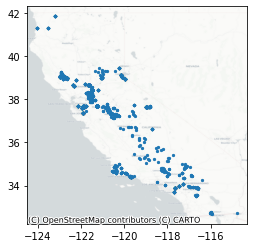

In [39]:
ax = gdf1_CA.plot(markersize=5)
cx.add_basemap(ax, crs=gdf1.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('on');

TypeError: The y variable is categorical, but one of ['numeric', 'datetime'] is required

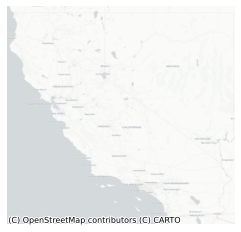

In [117]:
ax = gdfca.plot(markersize=5, alpha=0)
cx.add_basemap(ax, crs=gdfca.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('off')
#need to convert to numeric
sns.kdeplot(gdfca['LongitudeMeasure'], gdfca['LatitudeMeasure'], bw_adjust=1.5, shade=True, cmap='viridis', alpha=.5, ax=ax)

In [63]:
bounding_box = gdf1_CA.dissolve().envelope[0]

In [64]:
bound_box = gpd.GeoDataFrame(geometry=[bounding_box])

In [43]:
bound_box_gdf_CA.crs = 4326

In [44]:
bound_box_gdf_CA.set_crs(4326)

,geometry
0,"POLYGON ((-124.05118 32.68812, -114.76485 32.6..."


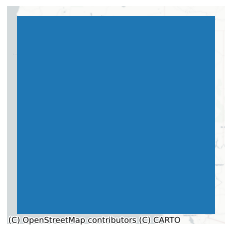

In [120]:
ax = gridca.plot(markersize=5)
cx.add_basemap(ax, crs=gdf1.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('off');

In [119]:
gridca

,geometry
0,"POLYGON ((-124.53034 32.68812, -124.53034 33.1..."
1,"POLYGON ((-124.53034 33.16727, -124.53034 33.6..."
2,"POLYGON ((-124.53034 33.64642, -124.53034 34.1..."
3,"POLYGON ((-124.53034 34.12558, -124.53034 34.6..."
4,"POLYGON ((-124.53034 34.60473, -124.53034 35.0..."
...,...
436,"POLYGON ((-114.94726 40.35457, -114.94726 40.8..."
437,"POLYGON ((-114.94726 40.83373, -114.94726 41.3..."
438,"POLYGON ((-114.94726 41.31288, -114.94726 41.7..."
439,"POLYGON ((-114.94726 41.79204, -114.94726 42.2..."


In [50]:
def make_grid(gdf, n_cells):
    gdf = gdf.copy()
    xmin, ymin, xmax, ymax= gdf.total_bounds
    cell_size = (xmax-xmin)/n_cells
    # create the cells in a loop
    grid_cells = []
    for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
        for y0 in np.arange(ymin, ymax+cell_size, cell_size):
            x1 = x0-cell_size
            y1 = y0+cell_size
            grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
    grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=gdf1.crs)
    return grid

In [118]:
gridca = make_grid(gdfca, n_cells=20)

In [121]:
def rasterize(gdf, grid, aggfunc="count", column=None, plot=True):
    merged = gpd.sjoin(gdf, grid, how='left', predicate='within').copy()
    if aggfunc == "count":
        column = 'count'
        output_col = column
        merged[column] = 1
    else:
        output_col = column + "_" + aggfunc   
    dissolved = merged.dissolve(by="index_right", aggfunc=aggfunc)[[column]]
    dissolved.columns = [output_col]
    grid.loc[dissolved.index, output_col] = dissolved[output_col].values
    if plot:
        ax = grid.plot(column=output_col, figsize=(12, 8), edgecolor="grey", legend=True)
        ax.axis('off')
        cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs=gdf.crs)
        plt.show()
    return grid

In [ ]:
hex_grid = h3fy(bound_box_gdf, resolution=9)